In [1]:
from __future__ import print_function
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D, Embedding
from keras.datasets import imdb
from keras.utils.vis_utils import plot_model
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
# Graphic output
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [2]:
data=pd.read_csv('heart303.csv')
data.head()
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])
X[0]
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std
X[0]
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
X_test, X_val, y_test, y_val = model_selection.train_test_split(X_test, y_test, test_size = 0.5,shuffle=True)

In [4]:
X_train[0]

array([ 0.9521966 ,  0.68100522, -0.93851463,  0.47839125, -1.14530589,
       -0.41763453, -1.00583187, -0.24694024,  1.43548113,  2.55392051,
        0.97635214,  1.24459328,  1.12302895])

In [5]:
# define a new keras model for binary classification
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from keras.layers import Dropout
from keras import regularizers

def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
 
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()
print(binary_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [6]:
history2=binary_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 34ms/step - loss: 0.6361 - accuracy: 0.7231 - val_loss: 0.5825 - val_accuracy: 0.7742
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5583 - accuracy: 0.8140 - val_loss: 0.5313 - val_accuracy: 0.8065
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5125 - accuracy: 0.8099 - val_loss: 0.4951 - val_accuracy: 0.8387
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4820 - accuracy: 0.8430 - val_loss: 0.4635 - val_accuracy: 0.8710
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4511 - accuracy: 0.8471 - val_loss: 0.4388 - val_accuracy: 0.8710
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4371 - accuracy: 0.8554 - val_loss: 0.4175 - val_accuracy: 0.8710
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4110 - accuracy: 0.8388 - val_loss: 0.4020 - val_accuracy: 0.8710
Epoch 8/100
8/8 [=========

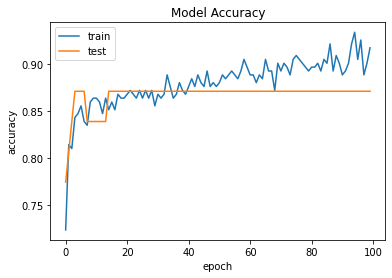

In [7]:
%matplotlib inline
# Model accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

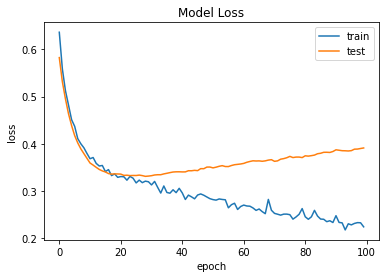

In [8]:
# Model Losss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [9]:
from sklearn.metrics import classification_report, accuracy_score

binary_pred1 = np.round(binary_model.predict(X_train)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_train, binary_pred1))
print(classification_report(y_train, binary_pred1))

Results for Binary Model
0.9173553719008265
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       107
           1       0.91      0.94      0.93       135

    accuracy                           0.92       242
   macro avg       0.92      0.91      0.92       242
weighted avg       0.92      0.92      0.92       242



In [10]:
from sklearn.metrics import classification_report, accuracy_score

binary_pred1 = np.round(binary_model.predict(X_val)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_val, binary_pred1))
print(classification_report(y_val, binary_pred1))

Results for Binary Model
0.8709677419354839
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.82      0.93      0.87        15

    accuracy                           0.87        31
   macro avg       0.88      0.87      0.87        31
weighted avg       0.88      0.87      0.87        31



In [11]:
from sklearn.metrics import classification_report, accuracy_score
 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_test, binary_pred))
print(classification_report(y_test, binary_pred))

Results for Binary Model
0.8666666666666667
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.92      0.80      0.86        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

